## Sympy notebook with the convolution
In this notebook we use *sympy*, a CAS for python, to calculate the convolution of an gaussian with an one-sided decaying exponential. *sympy* is not an requirement of *skultrafast*, there it is possible that it must be manually installed.  

In [1]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg'
import sympy
from sympy import *
init_printing()
print(sympy.__version__)

1.2


First we need to define sympy symbols.

In [2]:
A, t, ti = symbols('A t ti', real=True)
tau, sigma = symbols('tau sigma', positive=True)
step = Heaviside

Define $y=A\exp(-t/\tau)$ and the gaussian IRF. 

In [3]:
y = step(t)*A*exp(-t/tau)
y

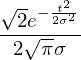

In [4]:
irf = 1/sqrt(2*pi*sigma**2)*exp(-t**2/(2*sigma**2))
irf

Next, we will calculate the covolution integral.

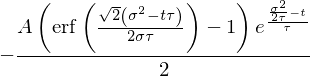

In [ ]:
func = integrate((irf.subs(t, t-ti)*y.subs(t, ti)), (ti, -oo, oo))
func = simplify(func)
func

Rewirte the `erf` with the `erfc` function:

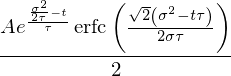

In [6]:
erfc, erf = special.error_functions.erfc, special.error_functions.erf 
func2 = func.rewrite(erfc)
func2

Plot the result to it makes sense:

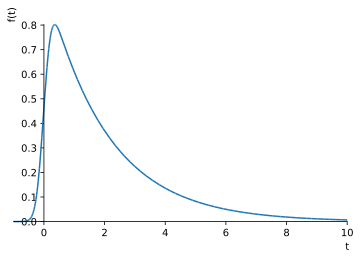

In [7]:
plot(func2.subs(sigma,0.2).subs(tau,2).subs(A, 1), (t, -1, 10))

## Normalized derivatives of a gaussian.
Used to model coherent contributions.

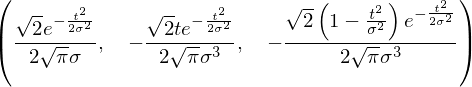

In [63]:
irf, irf.diff(t,1), irf.diff(t,2)

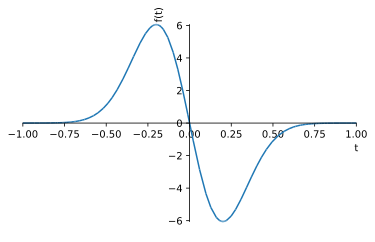

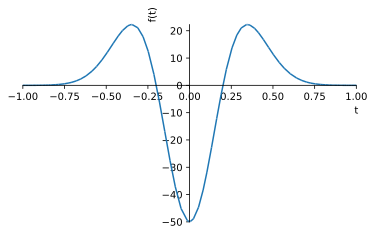

In [55]:
plot(irf.diff(t).subs(sigma,0.2).subs(tau,2), (t, -1, 1))
plot(irf.diff(t,2).subs(sigma,0.2).subs(tau,2), (t, -1, 1))

Find the maxima and evalute the positions

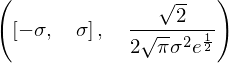

In [64]:
sol = solve(Eq(irf.diff(t, 2), 0), t)
norm1 = dirf.subs(t, sol[0])
sol, norm1

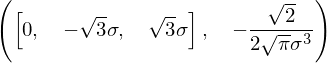

In [65]:
sol = solve(Eq(irf.diff(t, 3), 0), t)
norm2 = irf.diff(t,2).subs(t, sol[0])
sol, norm2

In [66]:
nf1, nf2 = irf.diff(t, 1)/norm1, irf.diff(t, 2)/norm2 

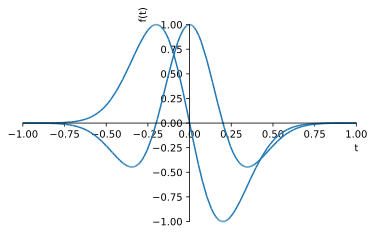

In [67]:
plot(nf1.subs(sigma,0.2).subs(tau,2),
     nf2.subs(sigma,0.2).subs(tau,2), (t, -1, 1))

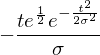

In [60]:
nf1

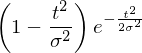

In [61]:
nf2